[View in Colaboratory](https://colab.research.google.com/github/mdasadul/bangla_embedding/blob/master/lession1.ipynb)

In [22]:
!pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl

[^C
Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/basecommand.py", line 228, in main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 291, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 103, in resolve
    self._resolve_one(requirement_set, req)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 257, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 210, in _get_abstract_dist_for
    self.require_hashes
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/operations/prepare.py", line 310, in prepare_linked_requirement
    progress_bar=self.progress_bar
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/download.py", line 8

In [15]:
!pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [4]:
!pip install fastai

    100% |████████████████████████████████| 122kB 7.6MB/s 
    100% |████████████████████████████████| 174kB 10.0MB/s 
    100% |████████████████████████████████| 51kB 8.6MB/s 
    100% |████████████████████████████████| 61kB 15.1MB/s 
    5% |█▊                              | 26.9MB 33.7MB/s eta 0:00:14

    100% |████████████████████████████████| 496.4MB 30kB/s 
    100% |████████████████████████████████| 112kB 17.8MB/s 
    100% |████████████████████████████████| 51kB 9.0MB/s 
    100% |████████████████████████████████| 3.4MB 13.1MB/s 
    100% |████████████████████████████████| 2.2MB 9.5MB/s 
    100% |████████████████████████████████| 1.5MB 12.7MB/s 
    100% |████████████████████████████████| 92kB 16.8MB/s 
    13% |████▌                           | 1.9MB 28.8MB/s eta 0:00:01

    100% |████████████████████████████████| 13.7MB 3.1MB/s 
    100% |████████████████████████████████| 112kB 25.7MB/s 
    100% |████████████████████████████████| 71kB 16.6MB/s 
    100% |████████████████████████████████| 81kB 19.2MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ |

 / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built feather-format pandas-summary torchtext bcolz
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [9]:
torch.cuda.is_available()

True

In [10]:
torch.backends.cudnn.enabled

True

In [11]:
!wget http://files.fast.ai/data/dogscats.zip

--2018-05-21 19:40:00--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  23.9MB/s    in 37s     

2018-05-21 19:40:37 (22.1 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
!python -m zipfile -e dogscats.zip data/

In [38]:
PATH = 'data/dogscats/'

['sample', 'valid', 'dogscats', 'models', 'train', 'test1']

In [39]:
PATH = "data/dogscats/"
sz=224
os.listdir(PATH)

['sample', 'valid', 'dogscats', 'models', 'train', 'test1']

In [40]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [41]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.7522.jpg',
 'cat.12446.jpg',
 'cat.8780.jpg',
 'cat.8468.jpg',
 'cat.7243.jpg']

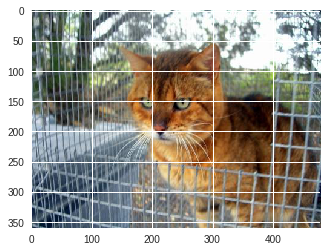

In [42]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [43]:
img.shape

(360, 479, 3)

In [44]:
img[:4,:4]

array([[[53, 66, 56],
        [58, 71, 62],
        [52, 65, 58],
        [49, 61, 59]],

       [[58, 71, 61],
        [65, 78, 69],
        [60, 72, 68],
        [53, 65, 63]],

       [[61, 74, 65],
        [71, 84, 77],
        [68, 80, 76],
        [57, 69, 69]],

       [[60, 73, 66],
        [74, 87, 80],
        [73, 85, 83],
        [59, 70, 72]]], dtype=uint8)

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 86787600.62it/s]


 73%|███████▎  | 264/360 [01:59<00:43,  2.21it/s]

In [0]:
data.val_y